In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models
from tensorflow.keras import layers
# import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer

### Extract dataset

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # 70,000 handwritten digits
# normalise the data to 0-1
train_images = train_images / 255.0 # training data
test_images = test_images / 255.0 # testing data

### Create the model

In [4]:
model = models.Sequential([
  layers.Input(shape=(28, 28)), # Specify the input shape directly here
  layers.Flatten(), # Now Flatten doesn't need the input_shape argument
  layers.Dense(128, activation='relu'),
  layers.Dense(10, activation='softmax')
])

### Compile it with the Adam optimizer and the binary crossentropy loss function and train it

In [5]:
t0 = default_timer()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)
# print(f'with GPU trained in {default_timer()-t0:.3f} sec')

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8420 - loss: 0.5687 - val_accuracy: 0.9505 - val_loss: 0.1749
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9534 - loss: 0.1643 - val_accuracy: 0.9641 - val_loss: 0.1299
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9692 - loss: 0.1075 - val_accuracy: 0.9660 - val_loss: 0.1121
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9773 - loss: 0.0787 - val_accuracy: 0.9703 - val_loss: 0.0997
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9824 - loss: 0.0605 - val_accuracy: 0.9714 - val_loss: 0.0966
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9863 - loss: 0.0480 - val_accuracy: 0.9720 - val_loss: 0.0934
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9891 - loss: 0.0392 - val_accuracy: 0.9752 - val_loss: 0.0852
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9923 - loss: 0.0313 - val_accuracy: 0.

### Graph accuracy and loss, and evaluate

In [1]:
%matplotlib widget
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

NameError: name 'history' is not defined

In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9755 - loss: 0.1013
Test Accuracy: 97.86%


### Now use the model to make predictions on the test set!

In [27]:
predictions = model.predict("test_images")
predicted_labels = np.argmax(predictions, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [49]:
print(type(test_images))

<class 'numpy.ndarray'>


ValueError: Unrecognized data type: x=number_5.jpg (of type <class 'str'>)

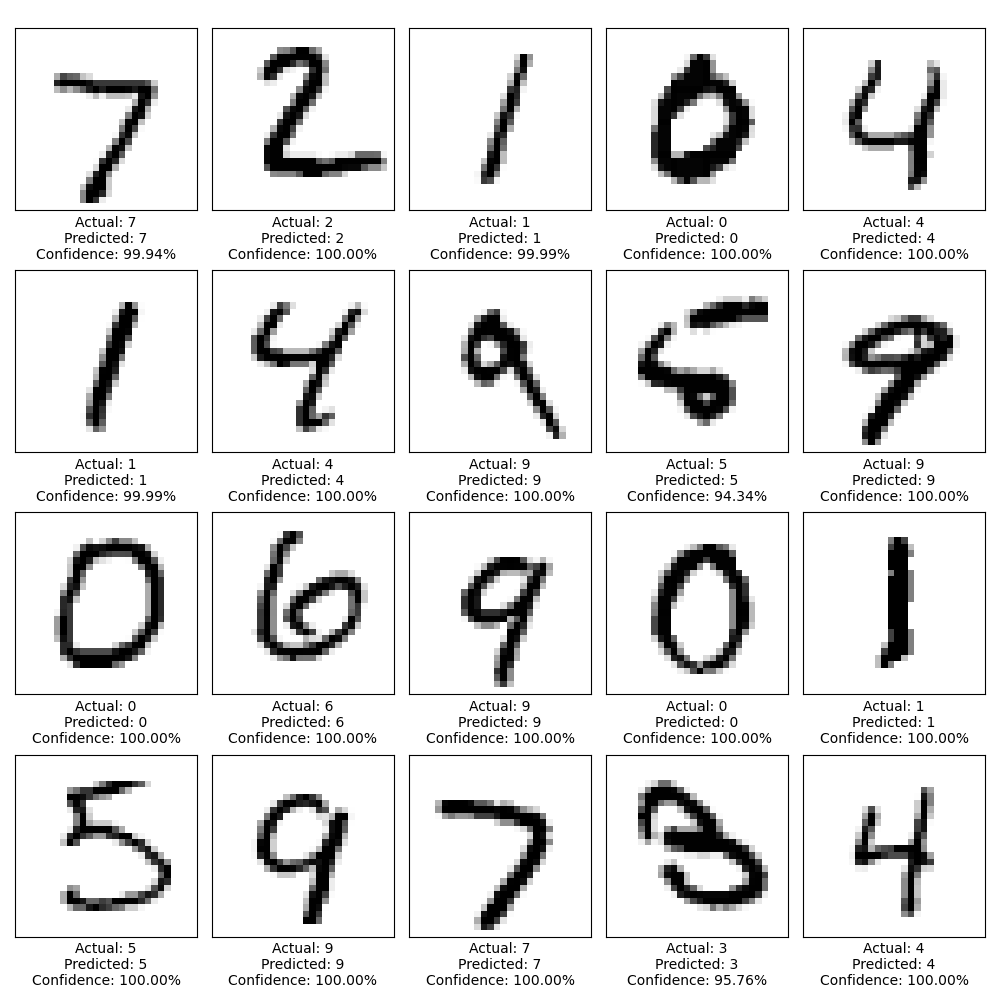

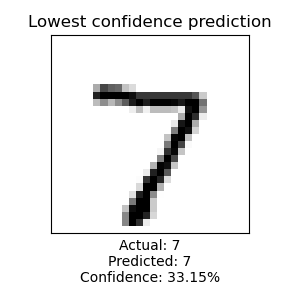

In [45]:
# Plotting the first 25 test images and their predicted labels
plt.figure(figsize=(10,10))
confidences = []
index = 0
for i in range((20)):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    confidence = np.max(predictions[i]) * 100
    confidences.append(confidence)
    if confidence < np.min(confidences):
        index = i
    plt.xlabel(f"Actual: {test_labels[i]}\nPredicted: {predicted_labels[i]}\nConfidence: {confidence:.2f}%")
plt.tight_layout()
plt.show()

plt.figure(figsize=(3,3))
plt.xticks([])
plt.yticks([])
plt.grid(False)
for i in range(len(test_images)):
    confidence = np.max(predictions[i]) * 100
    confidences.append(confidence)
    if confidence < np.min(confidences):
        index = i
plt.imshow(test_images[index], cmap=plt.cm.binary)
plt.xlabel(f"Actual: {test_labels[index]}\nPredicted: {predicted_labels[index]}\nConfidence: {np.min(confidences):.2f}%")
plt.title("Lowest Confidence Prediction")
plt.tight_layout()
plt.show()
